In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

# Load the dataset
data= pd.read_csv('/content/drive/MyDrive/Pr Project/telangana-crop-health-challenge20241111-30180-1t365vo/DataWithOrgFeatures.csv')


In [8]:
df = data[data.dataset == 'train'].reset_index(drop=True)
df.head()

,Unnamed: 0,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,...,Season,geometry,dataset,tif_path,ndvi,evi,ndwi,gndvi,savi,msavi
0,0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,25-11-2023,14-04-2024,97,...,Rabi,POLYGON ((78.18079255482755 17.978971746424413...,train,downloads/20240412T050649_20240412T051727_T43Q...,0.100756,-0.793684,8.488031,0.127153,0.151125,4232.596191
1,1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,13-11-2023,26-04-2024,82,...,Rabi,POLYGON ((78.17483419891283 17.981508840879556...,train,downloads/20240425T051649_20240425T052817_T43Q...,0.188090,0.564248,11.493762,0.187815,0.282110,3249.392822
2,2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,19-12-2023,28-04-2024,92,...,Rabi,POLYGON ((78.16888476438905 17.976727511659835...,train,downloads/20240427T050651_20240427T051439_T43Q...,0.206596,-1.456745,10.166884,0.206553,0.309869,3741.956055
3,3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,11-02-2023,04-11-2024,91,...,Rabi,POLYGON ((78.16821795882959 17.974690113471414...,train,downloads/20241103T050951_20241103T052004_T43Q...,0.206250,2.206184,10.446196,0.220995,0.309350,3673.396729
4,4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,12-12-2023,19-05-2024,94,...,Rabi,POLYGON ((78.17244459940454 17.969620948965225...,train,downloads/20240517T050651_20240517T051655_T43Q...,0.179721,-0.743638,8.665929,0.160657,0.269563,4227.338379


In [10]:
df.shape

(8775, 29)

In [6]:
df = df[df.isnull().sum(axis = 1) < 6]
df.isnull().sum()


,0
Unnamed: 0,0
FarmID,0
category,0
Crop,0
State,0
District,0
Sub-District,0
SDate,0
HDate,0
CropCoveredArea,0


In [80]:
from imblearn.under_sampling import RandomUnderSampler

# Define your feature matrix X and label vector y
X = df.drop(columns=['category'])
y = df['category']

# Instantiate the undersampler
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply downsampling to balance the dataset
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the updated dataset
print(data_resampled.head())

category
Diseased    422
Healthy     422
Pests       422
Stressed    422
Name: count, dtype: int64
      Unnamed: 0   FarmID       Crop      State      District Sub-District  \
7528        7528  1322873      Paddy  Telangana      Nalgonda      Chityal   
7660        7660  1319950      Maize  Telangana   Mahabubabad     Gangaram   
129          129   468165     Cotton  Telangana         Medak     Alladurg   
8624        8624  1319018     Cotton  Telangana      Adilabad  Inderavelly   
722          722  1327422  Groundnut  Telangana  Mahabubnagar      Hanwada   

           SDate       HDate  CropCoveredArea  CHeight  ...  \
7528  12-04-2023  04-01-2024               95       74  ...   
7660  07-01-2023  11-07-2023               99      136  ...   
129   20-12-2023  29-03-2024               71       94  ...   
8624  17-06-2023  19-09-2023               73       95  ...   
722   03-10-2023  24-02-2024               51       32  ...   

                                               geomet

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [81]:
df= data_resampled

In [82]:
df.shape

(1688, 29)

In [83]:
df.head()

,Unnamed: 0,FarmID,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,...,geometry,dataset,tif_path,ndvi,evi,ndwi,gndvi,savi,msavi,category
7528,7528,1322873,Paddy,Telangana,Nalgonda,Chityal,12-04-2023,04-01-2024,95,74,...,"POLYGON ((79.0198476826529 17.241858561411497,...",train,downloads/20240103T051219_20240103T052207_T44Q...,1.623064,49.265459,10.987920,0.047099,2.434387,3037.373535,Diseased
7660,7660,1319950,Maize,Telangana,Mahabubabad,Gangaram,07-01-2023,11-07-2023,99,136,...,"POLYGON ((80.24158502996335 17.91818958913163,...",train,downloads/20230707T050659_20230707T051902_T44Q...,0.085738,-4.081701,7.967181,0.099261,0.128598,4377.467285,Diseased
129,129,468165,Cotton,Telangana,Medak,Alladurg,20-12-2023,29-03-2024,71,94,...,POLYGON ((77.95939322224592 17.904493023632657...,train,downloads/20240328T050651_20240328T051856_T43Q...,0.090755,-3.258702,12.546230,0.118821,0.136120,2818.920898,Diseased
8624,8624,1319018,Cotton,Telangana,Adilabad,Inderavelly,17-06-2023,19-09-2023,73,95,...,"POLYGON ((78.60400501180496 19.48287624008996,...",train,downloads/20230915T050659_20230915T052214_T43Q...,3.636817,-46.434326,0.009402,3.762754,5.455072,8520.628906,Diseased
722,722,1327422,Groundnut,Telangana,Mahabubnagar,Hanwada,03-10-2023,24-02-2024,51,32,...,"POLYGON ((77.8513150323538 16.812397928749434,...",train,downloads/20240222T050829_20240222T051835_T43Q...,0.207519,-0.779005,10.488989,0.203907,0.311253,3620.757080,Diseased


In [84]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

# Check the mapping
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)


Class Mapping: {'Diseased': 0, 'Healthy': 1, 'Pests': 2, 'Stressed': 3}


In [85]:
# Ensure date columns are in datetime format
df['SDate'] = pd.to_datetime(df['SDate'], format='%d-%m-%Y') # Specify the correct format: Day-Month-Year
df['HDate'] = pd.to_datetime(df['HDate'], format='%d-%m-%Y') # Specify the correct format: Day-Month-Year

# Calculate crop age
df['CropAge'] = (df['HDate'] - df['SDate']).dt.days
df['CropAge']

,CropAge
7528,267
7660,185
129,100
8624,94
722,144
...,...
8702,154
8703,240
8720,121
8738,174


In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['NormalizedCropAge'] = scaler.fit_transform(df[['CropAge']])
df['NormalizedCropAge']

,NormalizedCropAge
7528,0.383502
7660,0.264834
129,0.141823
8624,0.133140
722,0.205499
...,...
8702,0.219971
8703,0.344428
8720,0.172214
8738,0.248915


In [87]:
df['HealthIndex'] = (df['ndvi'] + df['evi']) / 2
df['HealthIndex']

,HealthIndex
7528,2.544426e+01
7660,-1.997982e+00
129,-1.583973e+00
8624,-2.139875e+01
722,-2.857431e-01
...,...
8702,7.475653e-01
8703,7.582655e-01
8720,6.237815e-01
8738,1.548295e+09


In [88]:
df['WaterStress'] = df['WaterCov'] / (df['IrriCount'] + 1)
df['WaterStress']

,WaterStress
7528,18.800000
7660,10.400000
129,7.500000
8624,11.800000
722,8.250000
...,...
8702,19.666667
8703,8.600000
8720,13.333333
8738,9.000000


In [89]:
# Recompute correlation matrix for numeric features
# Select only numeric columns
numeric_columns = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()


# Focus on correlations with the target
target_correlation = correlation_matrix['category'].sort_values(ascending=False)
print(target_correlation)


category             1.000000
ndvi                 0.071907
savi                 0.070665
gndvi                0.042182
ndwi                 0.041257
evi                  0.038914
HealthIndex          0.038854
CHeight              0.004562
NormalizedCropAge   -0.005802
CropAge             -0.005802
msavi               -0.015257
FarmID              -0.031870
ExpYield            -0.055943
Unnamed: 0          -0.056774
IrriCount           -0.063565
WaterStress         -0.073784
WaterCov            -0.124618
CropCoveredArea     -0.137382
Name: category, dtype: float64


In [90]:
from sklearn.model_selection import train_test_split

X =numeric_columns.drop(columns=['Unnamed: 0'	,'category', 'FarmID', 'geometry', 'SDate', 'HDate'], errors='ignore')
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

    Diseased       0.32      0.35      0.33       121
     Healthy       0.22      0.19      0.20       139
       Pests       0.25      0.32      0.28       111
    Stressed       0.31      0.27      0.29       136

    accuracy                           0.28       507
   macro avg       0.28      0.28      0.28       507
weighted avg       0.28      0.28      0.27       507



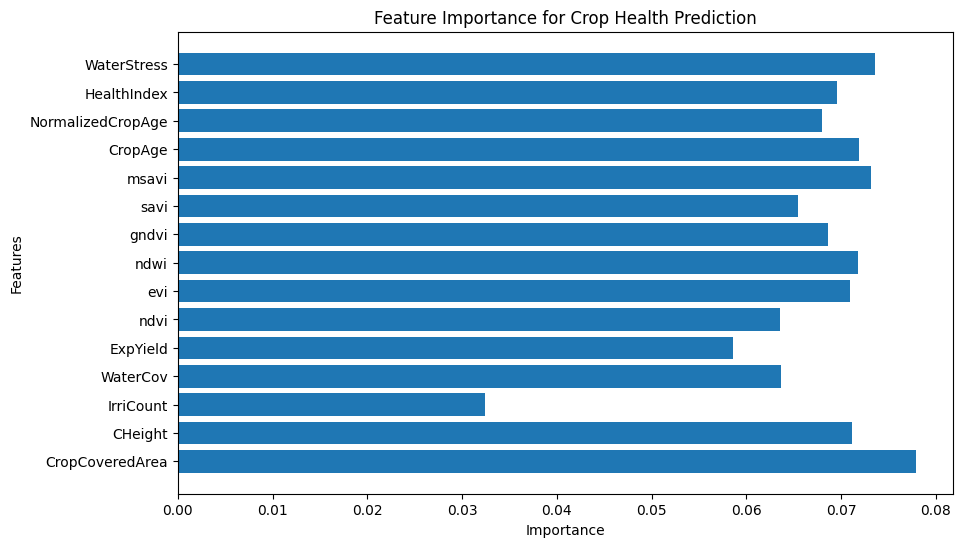

In [92]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Crop Health Prediction')
plt.show()


In [10]:
import pandas as pd
import numpy as np
from datetime import datetime

# Parse date columns
df['SDate'] = pd.to_datetime(df['SDate'], errors='coerce')
df['HDate'] = pd.to_datetime(df['HDate'], errors='coerce')

# Calculate crop age
current_date = datetime.now()
df['CropAge'] = (df['HDate'] - df['SDate']).dt.days  # Completed crops
df['CropAge'] = df['CropAge'].fillna((current_date - df['SDate']).dt.days)  # Ongoing crops

# Calculate average lifecycle for each crop
avg_lifecycle = df.groupby('Crop')['CropAge'].mean()
df['AvgCropAge'] = df['Crop'].map(avg_lifecycle)

# Create normalized crop age feature
df['NormalizedCropAge'] = df['CropAge'] / df['AvgCropAge']

# Create new features
df['NormalizedHeight'] = df['CHeight'] / df['CropCoveredArea']
df['IrrigationIntensity'] = df['IrriCount'] / df['CropAge']
df['WaterCoverageRatio'] = df['WaterCov'] / df['CropCoveredArea']

# Define healthy vs. unhealthy crop
# Thresholds can be fine-tuned based on domain knowledge
df['HealthyCrop'] = (df['ExpYield'] >= 0.8 * df['ExpYield'].mean()).astype(int)
# Select only numeric columns
numeric_columns = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()



# Display key correlations
correlation_matrix['HealthyCrop'].sort_values(ascending=False)


,HealthyCrop
HealthyCrop,1.000000
ExpYield,0.773097
CropCoveredArea,0.634932
WaterCov,0.562349
CHeight,0.388561
IrriCount,0.359476
WaterCoverageRatio,0.311334
NormalizedHeight,0.202317
msavi,0.077155
IrrigationIntensity,0.072572


In [9]:
to_drop = ['FarmID','tif_path','dataset','geometry','Unnamed: 0','State']
df.drop(to_drop, axis=1, inplace=True)

In [7]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_columns:
    if col not in ['FarmID', 'geometry']:  # Exclude IDs and non-predictive fields
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [8]:
# Generate date-based features
if 'SDate' in df.columns and 'HDate' in df.columns:
    df['SDate'] = pd.to_datetime(df['SDate'])
    df['HDate'] = pd.to_datetime(df['HDate'])
    df['CropDuration'] = (df['HDate'] - df['SDate']).dt.days
    df['SowingMonth'] = df['SDate'].dt.month
    df['HarvestMonth'] = df['HDate'].dt.month

In [9]:
# Interaction terms for numeric features
numeric_columns = df.select_dtypes(include=["number"]).columns
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        if i < j:  # Avoid duplicate combinations
            df[f"{col1}_x_{col2}"] = df[col1] * df[col2]
            df[f"{col1}_div_{col2}"] = np.where(df[col2] != 0, df[col1] / df[col2], 0)

<ipython-input-9-76992b08fc2b>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col1}_div_{col2}"] = np.where(df[col2] != 0, df[col1] / df[col2], 0)
<ipython-input-9-76992b08fc2b>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col1}_x_{col2}"] = df[col1] * df[col2]
<ipython-input-9-76992b08fc2b>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

In [10]:
# Vegetation index transformations
if set(['NDVI', 'EVI', 'NDWI', 'GNDVI', 'SAVI', 'MSAVI']).issubset(df.columns):
    df['NDVI_EVI_diff'] = df['NDVI'] - df['EVI']
    df['NDVI_EVI_ratio'] = np.where(df['EVI'] != 0, df['NDVI'] / df['EVI'], 0)


In [35]:

# Feature importance analysis (Optional: using random forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [36]:
# Target variable (adjust 'CropHealth' to your dataset's actual target column)
target_column = "category"
#X = df.drop(columns=[target_column, 'FarmID', 'geometry'], errors='ignore')  # Drop non-predictive columns
y = df[target_column]


In [37]:
X = df.drop(columns=[target_column], errors='ignore')

In [43]:
X.head()

,Crop,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,...,msavi_x_HarvestMonth,msavi_div_HarvestMonth,CropDuration_x_SowingMonth,CropDuration_div_SowingMonth,CropDuration_x_HarvestMonth,CropDuration_div_HarvestMonth,SowingMonth_x_HarvestMonth,SowingMonth_div_HarvestMonth,SDate_month,HDate_month
0,5,5,61,719163,719163,97,54,4,0,3,...,4232.596191,4232.596191,-1,-1.0,-1,-1.0,1,1.0,1,1
1,5,5,61,719163,719163,82,58,4,0,3,...,3249.392822,3249.392822,0,0.0,0,0.0,1,1.0,1,1
2,5,5,61,719163,719163,92,91,4,0,3,...,3741.956055,3741.956055,0,0.0,0,0.0,1,1.0,1,1
3,5,5,61,719163,719163,91,52,4,0,3,...,3673.396729,3673.396729,-1,-1.0,-1,-1.0,1,1.0,1,1
4,5,5,61,719163,719163,94,55,4,0,3,...,4227.338379,4227.338379,0,0.0,0,0.0,1,1.0,1,1


In [38]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Train random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Feature importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
print("Top Features:")
print(feature_importances.head(20))

Top Features:
                         Feature  Importance
70     category_div_HarvestMonth    0.092627
67        category_x_SowingMonth    0.065806
68      category_div_SowingMonth    0.064676
57               category_x_ndwi    0.051866
69       category_x_HarvestMonth    0.049100
32  category_div_CropCoveredArea    0.048997
49           category_x_ExpYield    0.035224
31    category_x_CropCoveredArea    0.034208
64            category_div_msavi    0.030302
45          category_x_IrriCount    0.029942
51             category_x_Season    0.028618
34          category_div_CHeight    0.027227
46        category_div_IrriCount    0.027205
48         category_div_WaterCov    0.027082
47           category_x_WaterCov    0.026282
50         category_div_ExpYield    0.025913
33            category_x_CHeight    0.021024
63              category_x_msavi    0.019294
58             category_div_ndwi    0.018609
52           category_div_Season    0.016757


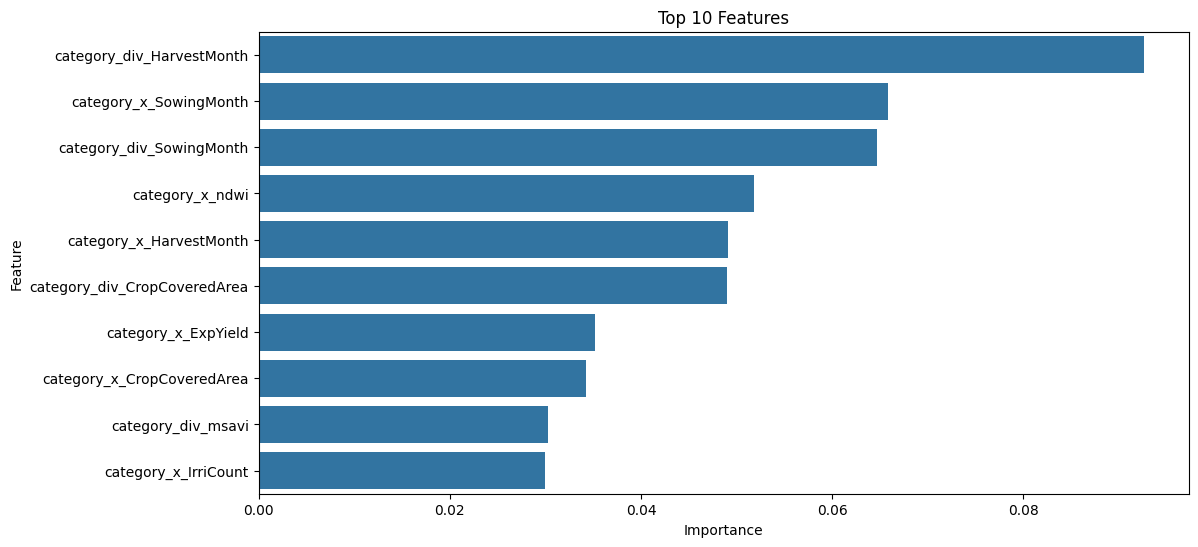

In [46]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10))
plt.title("Top 10 Features")
plt.show()

In [47]:

# Save the engineered dataset
df.to_csv("EngineeredDataset.csv", index=False)
